# Insurance Claim Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.shape

(1000, 40)

In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [6]:
df.drop(['_c39'], axis = 1, inplace = True)

In [7]:
#checking categorical columns
categorical=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical.append(i)
print(categorical)

['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [8]:
# checking for numerical columns
numerical=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical.append(i)
print(numerical)

['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


In [9]:
numerical.append('policy_annual_premium')

In [10]:
df[categorical].head(10)

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,17-10-2014,OH,250/500,MALE,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,...,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,27-06-2006,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,...,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,?,?,Mercedes,E400,Y
2,06-09-2000,OH,100/300,FEMALE,PhD,sales,board-games,own-child,22-02-2015,Multi-vehicle Collision,...,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,25-05-1990,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,10-01-2015,Single Vehicle Collision,...,Major Damage,Police,OH,Arlington,6956 Maple Drive,?,NO,Chevrolet,Tahoe,Y
4,06-06-2014,IL,500/1000,MALE,Associate,sales,board-games,unmarried,17-02-2015,Vehicle Theft,...,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N
5,12-10-2006,OH,250/500,FEMALE,PhD,tech-support,bungie-jumping,unmarried,02-01-2015,Multi-vehicle Collision,...,Major Damage,Fire,SC,Arlington,8973 Washington St,NO,NO,Saab,95,Y
6,04-06-2000,IN,250/500,MALE,PhD,prof-specialty,board-games,husband,13-01-2015,Multi-vehicle Collision,...,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,?,?,Nissan,Pathfinder,N
7,03-02-1990,IL,100/300,MALE,Associate,tech-support,base-jumping,unmarried,27-02-2015,Multi-vehicle Collision,...,Total Loss,Police,VA,Columbus,3525 3rd Hwy,?,YES,Audi,A5,N
8,05-02-1997,IL,100/300,FEMALE,PhD,other-service,golf,own-child,30-01-2015,Single Vehicle Collision,...,Total Loss,Police,WV,Arlington,4872 Rock Ridge,NO,YES,Toyota,Camry,N
9,25-07-2011,IL,100/300,MALE,PhD,priv-house-serv,camping,wife,05-01-2015,Single Vehicle Collision,...,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,NO,?,Saab,92x,N


In [11]:
df[numerical].head(10)

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_annual_premium
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,1406.91
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007,1197.22
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007,1413.14
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,1415.74
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,1583.91
5,256,39,104594,1000,1351.10,0,478456,0,0,19,3,0,2,64100,6410,6410,51280,2003,1351.10
6,137,34,413978,1000,1333.35,0,441716,0,-77000,0,3,0,0,78650,21450,7150,50050,2012,1333.35
7,165,37,429027,1000,1137.03,0,603195,0,0,23,3,2,2,51590,9380,9380,32830,2015,1137.03
8,27,33,485665,500,1442.99,0,601734,0,0,21,1,1,1,27700,2770,2770,22160,2012,1442.99
9,212,42,636550,500,1315.68,0,600983,0,-39300,14,1,2,1,42300,4700,4700,32900,1996,1315.68


In [12]:
df[numerical].describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_annual_premium
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,1256.406150
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,244.167395
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,433.330000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,1089.607500
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,1257.200000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,1415.695000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,2047.590000


In [13]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

<AxesSubplot:>

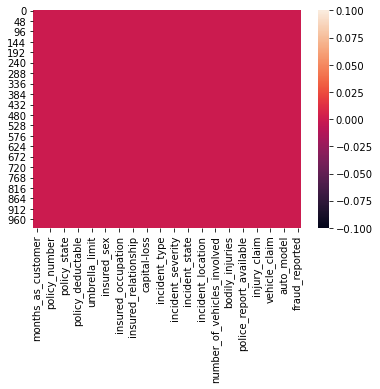

In [14]:
sns.heatmap(df.isnull())

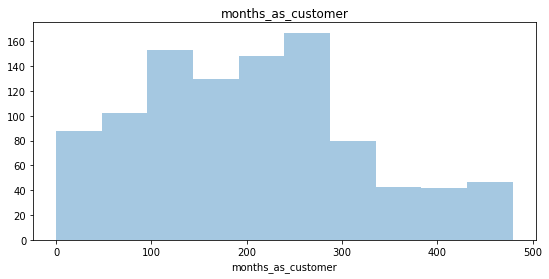

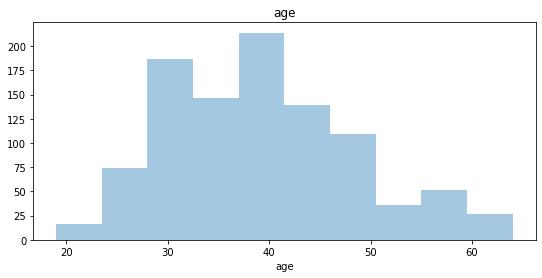

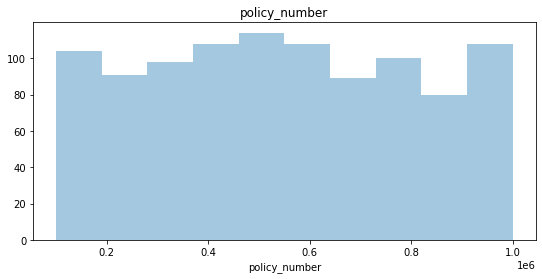

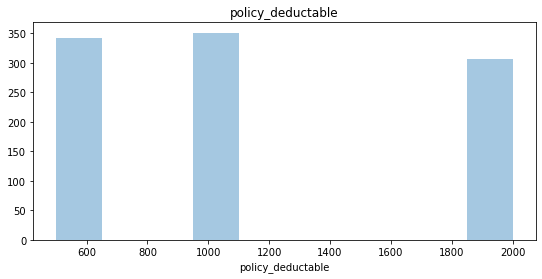

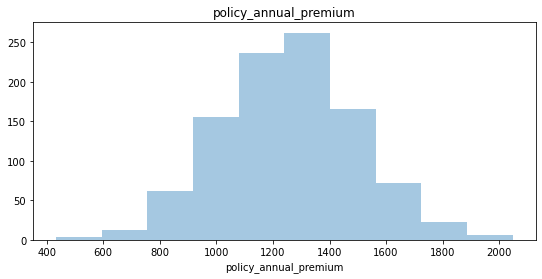

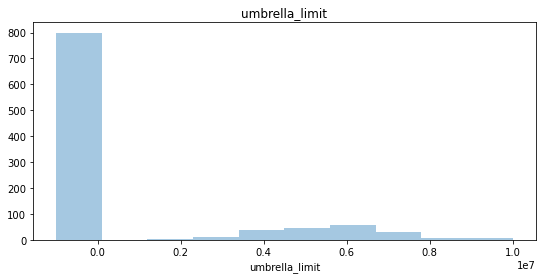

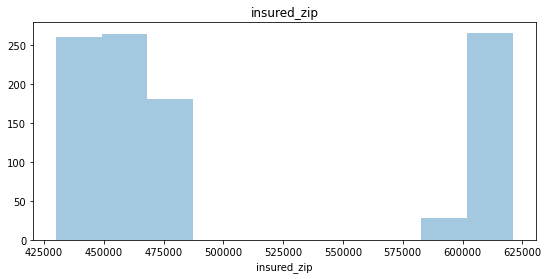

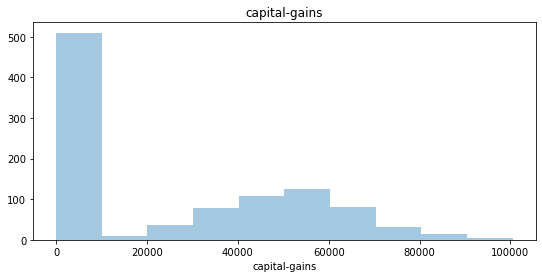

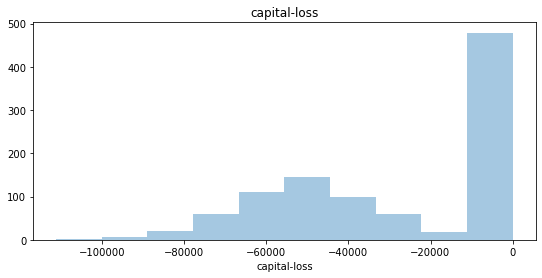

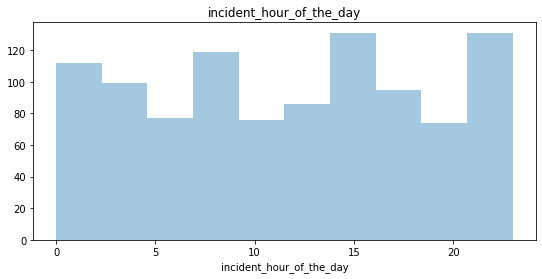

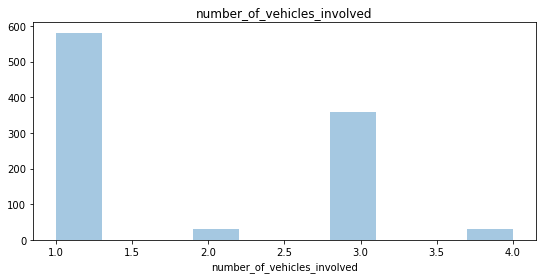

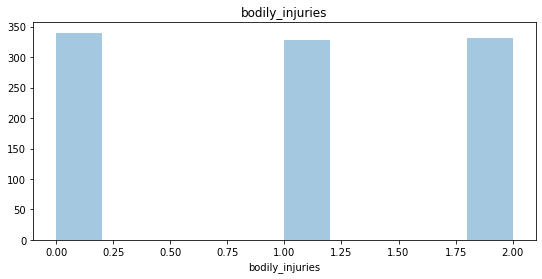

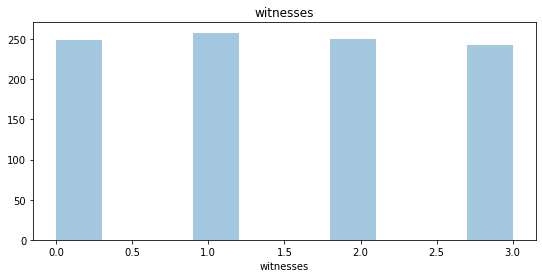

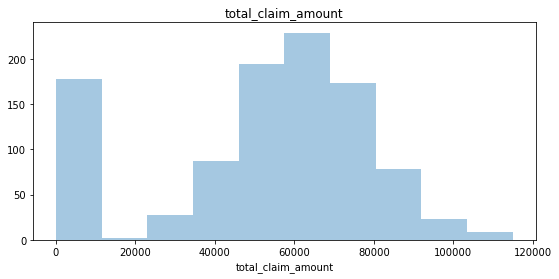

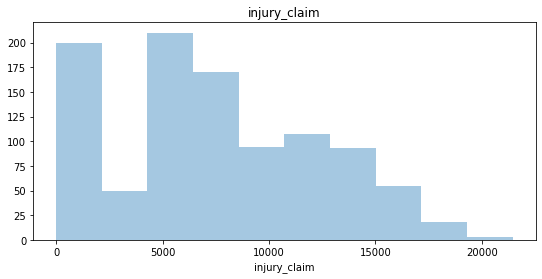

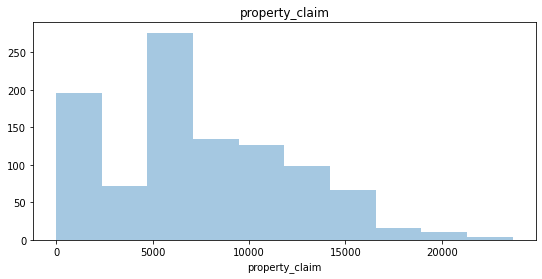

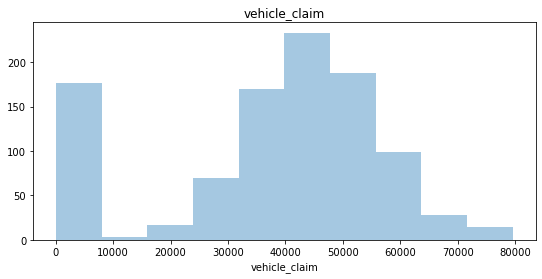

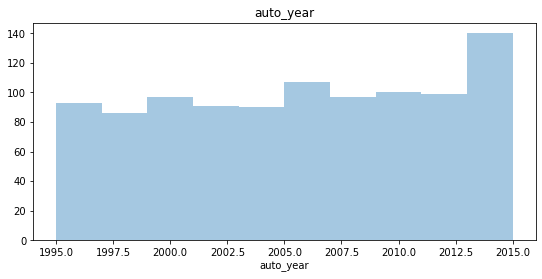

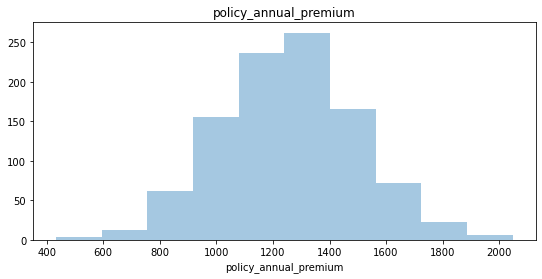

In [16]:
for i in df[numerical]:                                 #univariate analysis
    plt.figure(figsize = (9,4))
    sns.distplot(df[i], bins = 10, kde = False)
    plt.title(i)
    plt.show()

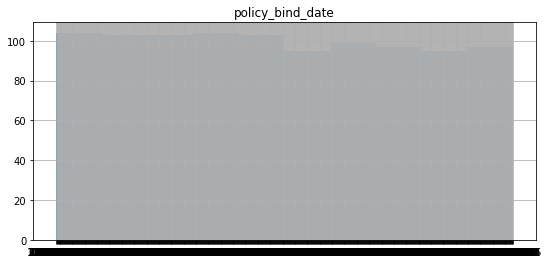

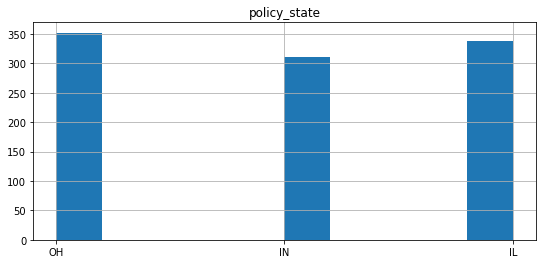

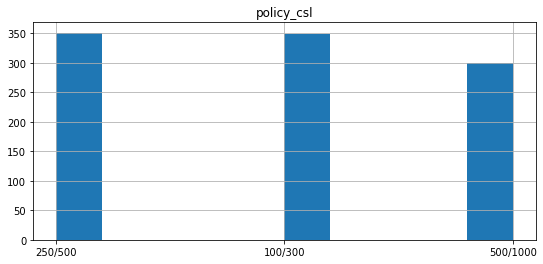

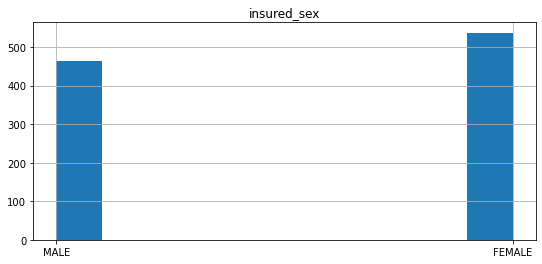

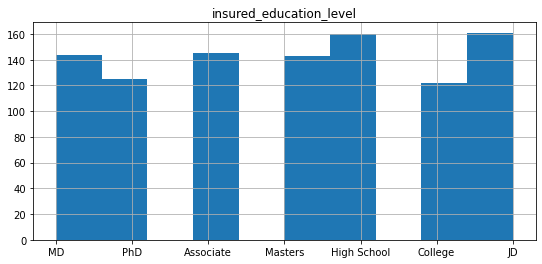

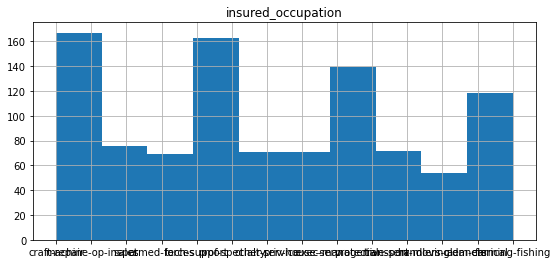

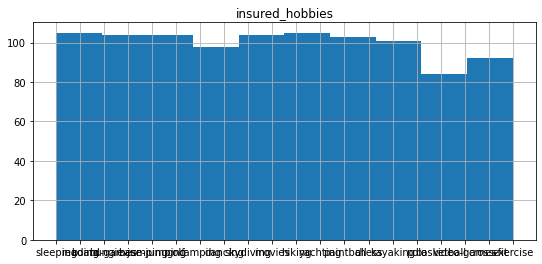

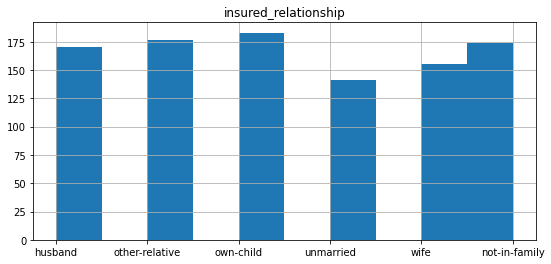

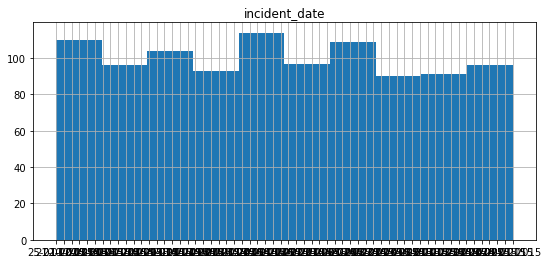

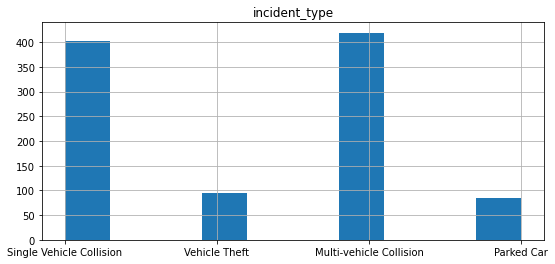

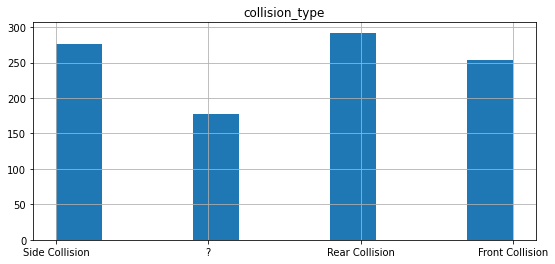

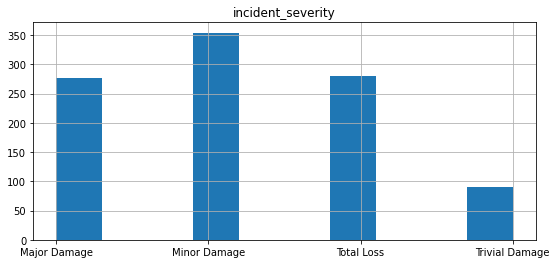

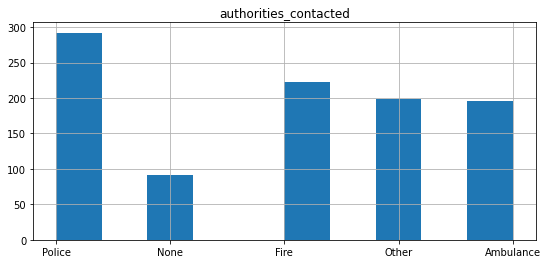

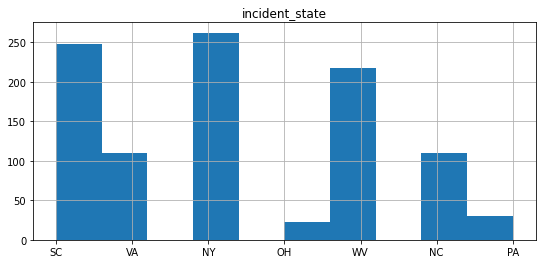

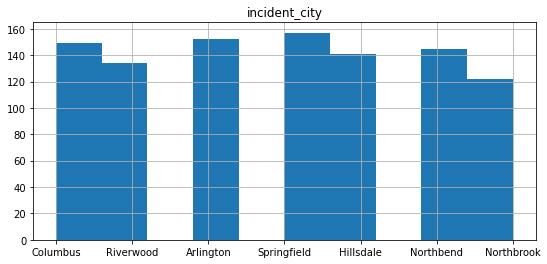

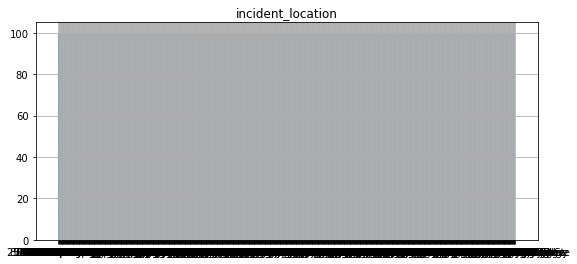

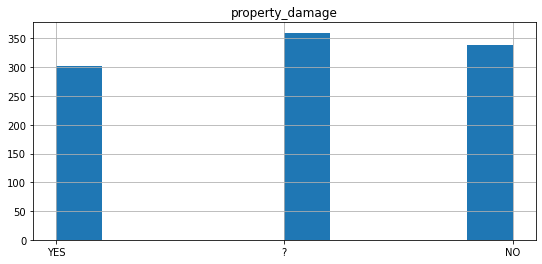

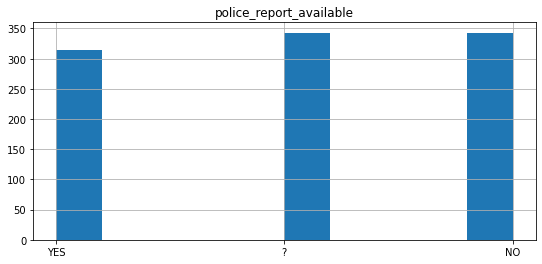

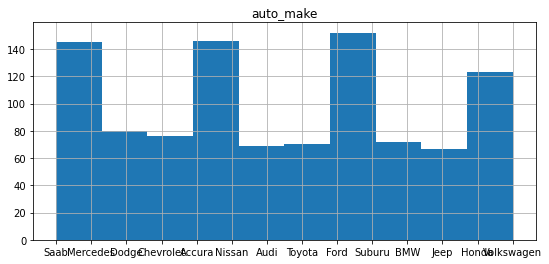

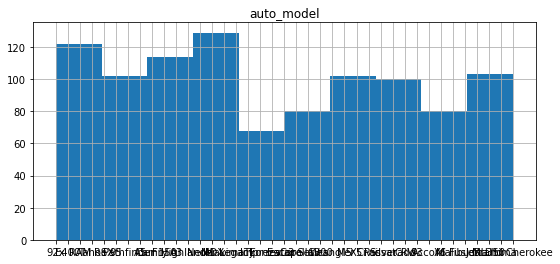

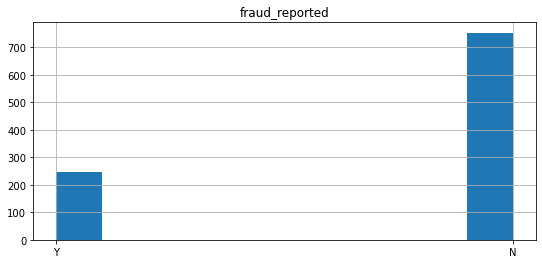

In [22]:
for i in categorical:                                
    plt.figure(figsize = (9,4))
    df[i].hist(grid=True)
    plt.title(i)
    plt.show()

In [23]:
df.drop(['policy_bind_date', 'incident_date', 'incident_location'], axis = 1, inplace = True)

In [24]:
categorical.remove('policy_bind_date')
categorical.remove('incident_date')
categorical.remove('incident_location')

In [25]:
df[categorical].head()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,92x,Y
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,?,?,Mercedes,E400,Y
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,RAM,N
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,?,NO,Chevrolet,Tahoe,Y
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,?,Minor Damage,None,NY,Arlington,NO,NO,Accura,RSX,N


In [26]:
# we will replace the ? values with unknown
df['collision_type'].replace('?', 'Unknown', inplace = True)
df['property_damage'].replace('?', 'Unknown', inplace = True)
df['police_report_available'].replace('?', 'Unknown', inplace = True)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

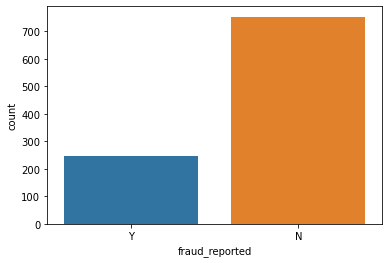

In [27]:
sns.countplot(df["fraud_reported"])

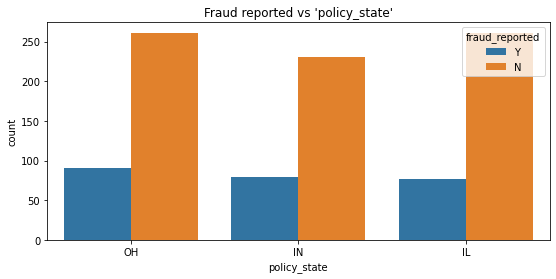

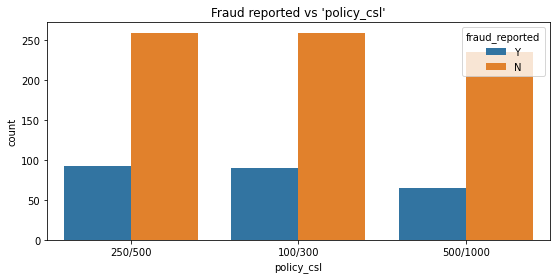

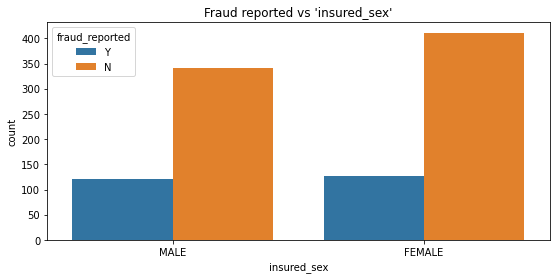

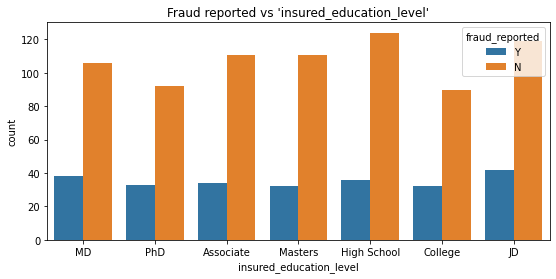

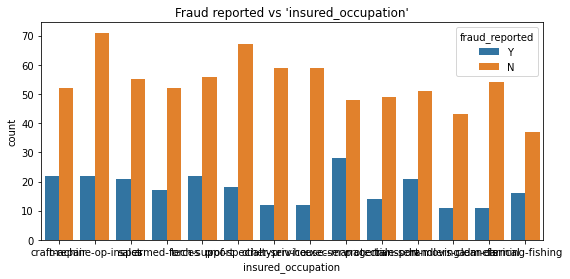

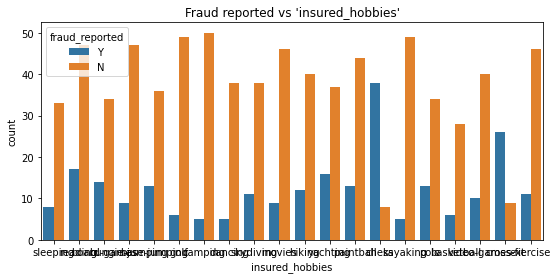

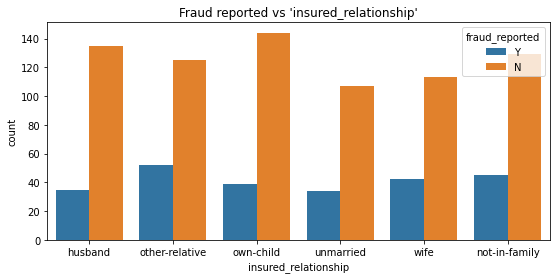

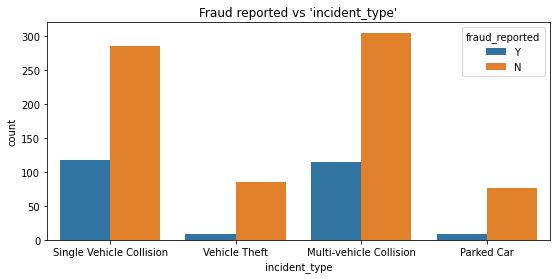

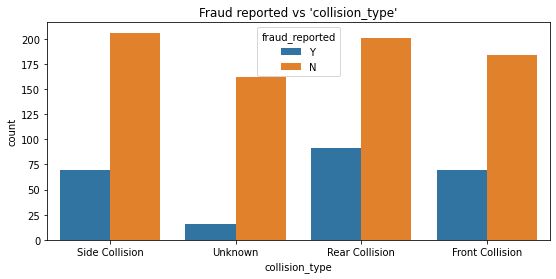

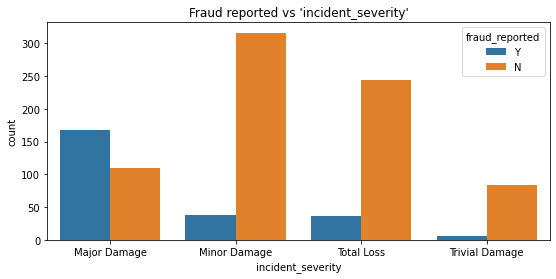

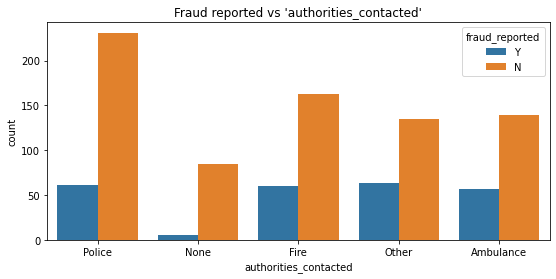

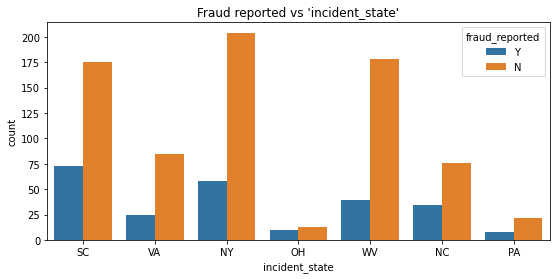

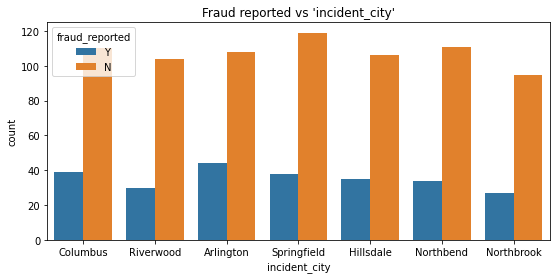

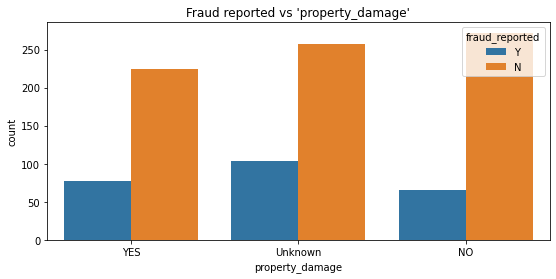

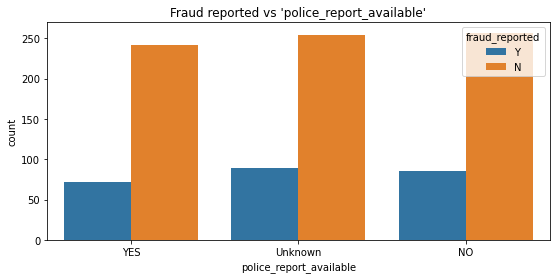

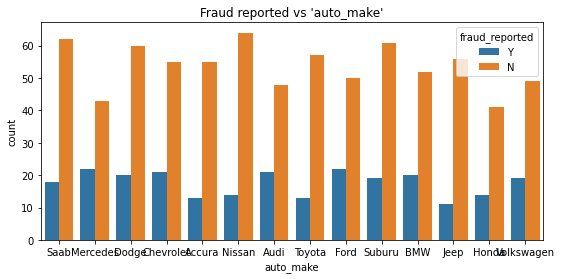

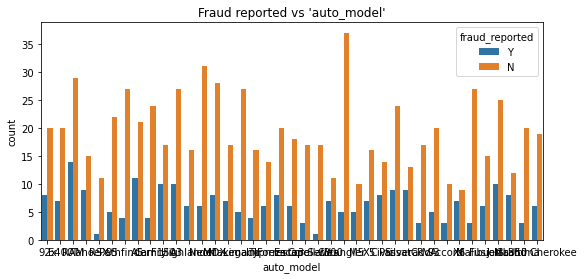

In [28]:
for i in categorical[:-1]:                                #bivariate analysis
    plt.figure(figsize=(9,4))
    plt.title("Fraud reported vs '%s'"%i)
    sns.countplot(df[i],hue=df['fraud_reported'])

The highest fraud reported is seen in incident_severity

In [29]:
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


<AxesSubplot:>

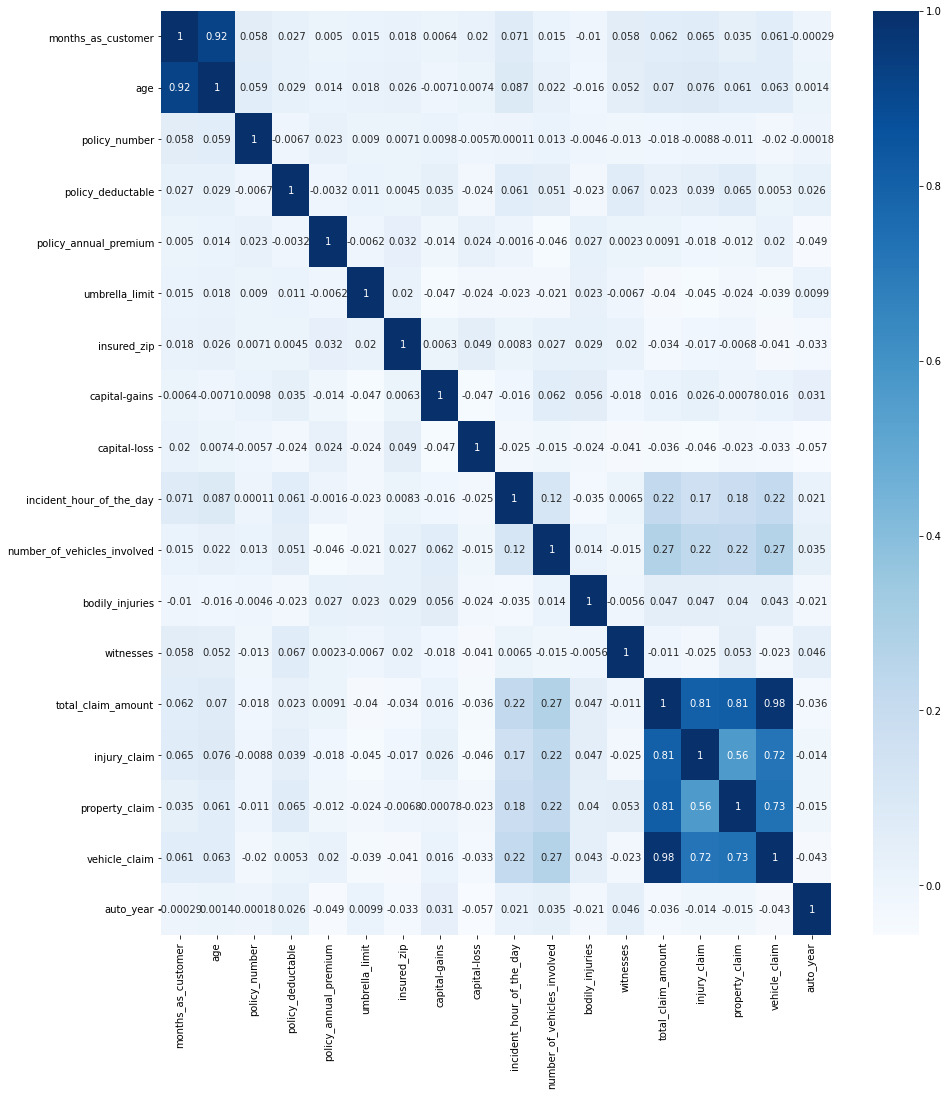

In [31]:
plt.figure(figsize=(15,17))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

Fraud reported is highly correlated with vehicle_claim

months_as_customer                 AxesSubplot(0.125,0.71587;0.110714x0.16413)
age                             AxesSubplot(0.257857,0.71587;0.110714x0.16413)
policy_number                   AxesSubplot(0.390714,0.71587;0.110714x0.16413)
policy_deductable               AxesSubplot(0.523571,0.71587;0.110714x0.16413)
policy_annual_premium           AxesSubplot(0.656429,0.71587;0.110714x0.16413)
umbrella_limit                  AxesSubplot(0.789286,0.71587;0.110714x0.16413)
insured_zip                       AxesSubplot(0.125,0.518913;0.110714x0.16413)
capital-gains                  AxesSubplot(0.257857,0.518913;0.110714x0.16413)
capital-loss                   AxesSubplot(0.390714,0.518913;0.110714x0.16413)
incident_hour_of_the_day       AxesSubplot(0.523571,0.518913;0.110714x0.16413)
number_of_vehicles_involved    AxesSubplot(0.656429,0.518913;0.110714x0.16413)
bodily_injuries                AxesSubplot(0.789286,0.518913;0.110714x0.16413)
witnesses                         AxesSubplot(0.125,

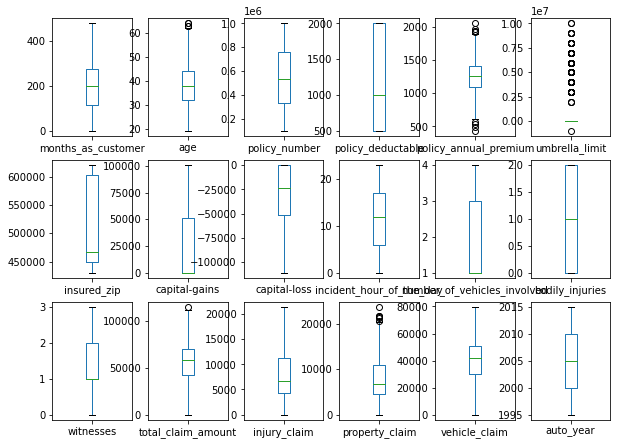

In [41]:
df.plot(kind='box', subplots=True,layout=(4,6), figsize=(10,10))

As there are not much outliers present in the data, there's no need to treat them

In [42]:
df[numerical].skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
policy_annual_premium          0.004402
dtype: float64

Since there's not much skewness present in the data, we dont have treat this as well

# Label encoding the data

In [43]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for i in categorical:
    df[i] = label_encoder.fit_transform(df[i])

In [44]:
x = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [46]:
max_accuracy=0
max_randomstate=0
for i in range(1,500):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state=i)
    lr= LogisticRegression()
    lr.fit(x_train, y_train)
    predrf= lr.predict(x_test)
    acc= accuracy_score(y_test, predrf)
    if acc>max_accuracy:
        max_accuracy=acc
        max_randomstate=i
print('Best accuracy is', max_accuracy,'on random_state', max_randomstate)

Best accuracy is 0.84 on random_state 190


# Logistic Regression

In [47]:
lr= LogisticRegression()
lr.fit(x_train, y_train)
predlr= lr.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

0.71
[[141   0]
 [ 58   1]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       141
           1       1.00      0.02      0.03        59

    accuracy                           0.71       200
   macro avg       0.85      0.51      0.43       200
weighted avg       0.79      0.71      0.59       200



# Support Vector Classifier

In [48]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train, y_train)
predsvc= svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.705
[[141   0]
 [ 59   0]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.83       141
           1       0.00      0.00      0.00        59

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.50      0.70      0.58       200



# Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(x_train, y_train)
predrfc= rfc.predict(x_test)
print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test, predrfc))

0.69
[[130  11]
 [ 51   8]]
              precision    recall  f1-score   support

           0       0.72      0.92      0.81       141
           1       0.42      0.14      0.21        59

    accuracy                           0.69       200
   macro avg       0.57      0.53      0.51       200
weighted avg       0.63      0.69      0.63       200



# KNeighbors Classifier

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(x_train, y_train)
predknc= knc.predict(x_test)
print(accuracy_score(y_test, predknc))
print(confusion_matrix(y_test, predknc))
print(classification_report(y_test, predknc))

0.655
[[124  17]
 [ 52   7]]
              precision    recall  f1-score   support

           0       0.70      0.88      0.78       141
           1       0.29      0.12      0.17        59

    accuracy                           0.66       200
   macro avg       0.50      0.50      0.48       200
weighted avg       0.58      0.66      0.60       200



# Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(x_train, y_train)
preddtc= dtc.predict(x_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

0.755
[[117  24]
 [ 25  34]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       141
           1       0.59      0.58      0.58        59

    accuracy                           0.76       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.75      0.76      0.75       200



# Cross Validation Score

In [52]:
from sklearn.model_selection import cross_val_score

In [54]:
# cv score for Logistic Regression
print('Logistic Regression:',cross_val_score(lr,x,y,cv=5).mean())

# cv score for Random Forest Classifier
print('Random Forest Classifier:',cross_val_score(rfc,x,y,cv=5).mean())

# cv score for SVC
print('Support Vector Classifier:',cross_val_score(svc,x,y,cv=5).mean())

#cv score for Kkneighbors Classifier
print('Kneighbors Classifier:',cross_val_score(knc,x,y,cv=5).mean())

#cv score for Decision Tree Classifier
print('Decision Tree Classifier:',cross_val_score(dtc,x,y,cv=5).mean())


Logistic Regression: 0.751
Random Forest Classifier: 0.762
Support Vector Classifier: 0.7529999999999999
Kneighbors Classifier: 0.704
Decision Tree Classifier: 0.77


# Hyper Parameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV

#creating parameter list to pass in GridSearchCV
parameters= {'max_features':['auto','sqrt','log2'],
            'max_depth': [4,5,6,7,8],
            'criterion': ['gini','entropy']}

In [57]:
gsv= GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
gsv.fit(x_train, y_train)  #fitting the data in model
gsv.best_params_ #printing the best parameters found by GridSearchCV

{'criterion': 'gini', 'max_depth' :7, 'max_features': 'sqrt'}

gsv_pred=gsv.best_estimator_.predict(x_test)   #predicting with best parameters
accuracy_score(y_test, gsv_pred)   #checking final accuracy

0.7

# AUC ROC Curve

In [58]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [64]:
y=rfc.predict_proba(x_test)[:,1]
y

array([0.04, 0.07, 0.24, 0.19, 0.39, 0.43, 0.15, 0.59, 0.26, 0.12, 0.49,
       0.37, 0.16, 0.56, 0.48, 0.1 , 0.16, 0.14, 0.21, 0.25, 0.09, 0.26,
       0.48, 0.05, 0.17, 0.11, 0.22, 0.53, 0.18, 0.19, 0.18, 0.18, 0.1 ,
       0.23, 0.3 , 0.15, 0.16, 0.44, 0.08, 0.48, 0.15, 0.22, 0.09, 0.14,
       0.14, 0.19, 0.21, 0.18, 0.31, 0.15, 0.02, 0.08, 0.14, 0.39, 0.24,
       0.18, 0.38, 0.16, 0.07, 0.4 , 0.17, 0.09, 0.13, 0.12, 0.18, 0.11,
       0.15, 0.24, 0.34, 0.32, 0.27, 0.18, 0.16, 0.39, 0.54, 0.09, 0.12,
       0.29, 0.16, 0.4 , 0.57, 0.11, 0.33, 0.18, 0.12, 0.46, 0.1 , 0.19,
       0.1 , 0.55, 0.15, 0.4 , 0.48, 0.58, 0.41, 0.54, 0.52, 0.26, 0.19,
       0.15, 0.35, 0.2 , 0.44, 0.24, 0.16, 0.19, 0.28, 0.51, 0.62, 0.14,
       0.04, 0.14, 0.12, 0.35, 0.19, 0.22, 0.09, 0.19, 0.23, 0.09, 0.18,
       0.04, 0.52, 0.4 , 0.53, 0.15, 0.07, 0.1 , 0.21, 0.07, 0.17, 0.54,
       0.14, 0.3 , 0.1 , 0.06, 0.26, 0.25, 0.28, 0.04, 0.14, 0.27, 0.21,
       0.16, 0.16, 0.56, 0.08, 0.19, 0.47, 0.2 , 0.

In [65]:
fpr,tpr,thresholds=roc_curve(y_test,y)

In [66]:
fpr

array([0.        , 0.        , 0.0141844 , 0.0141844 , 0.02836879,
       0.05673759, 0.07092199, 0.07801418, 0.07801418, 0.09929078,
       0.09929078, 0.09929078, 0.09929078, 0.10638298, 0.10638298,
       0.12056738, 0.13475177, 0.14184397, 0.14184397, 0.14893617,
       0.14893617, 0.15602837, 0.15602837, 0.16312057, 0.17021277,
       0.17730496, 0.18439716, 0.19148936, 0.21985816, 0.24113475,
       0.26950355, 0.26950355, 0.29787234, 0.31205674, 0.43971631,
       0.46808511, 0.54609929, 0.60283688, 0.68794326, 0.70921986,
       0.75886525, 0.78014184, 0.82978723, 0.86524823, 0.87943262,
       0.91489362, 0.92198582, 0.94326241, 0.97163121, 0.9929078 ,
       1.        ])

In [67]:
tpr

array([0.        , 0.01694915, 0.01694915, 0.03389831, 0.06779661,
       0.10169492, 0.13559322, 0.13559322, 0.20338983, 0.25423729,
       0.30508475, 0.37288136, 0.40677966, 0.42372881, 0.44067797,
       0.50847458, 0.52542373, 0.52542373, 0.54237288, 0.59322034,
       0.61016949, 0.61016949, 0.62711864, 0.62711864, 0.6440678 ,
       0.6440678 , 0.6779661 , 0.69491525, 0.69491525, 0.69491525,
       0.71186441, 0.76271186, 0.77966102, 0.88135593, 0.88135593,
       0.88135593, 0.89830508, 0.94915254, 0.94915254, 0.94915254,
       0.96610169, 0.96610169, 0.96610169, 0.98305085, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [68]:
thresholds

array([1.62, 0.62, 0.58, 0.57, 0.55, 0.53, 0.52, 0.51, 0.49, 0.48, 0.45,
       0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.35, 0.34, 0.33,
       0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24, 0.23, 0.22,
       0.2 , 0.18, 0.17, 0.16, 0.15, 0.14, 0.13, 0.12, 0.11, 0.1 , 0.09,
       0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02])

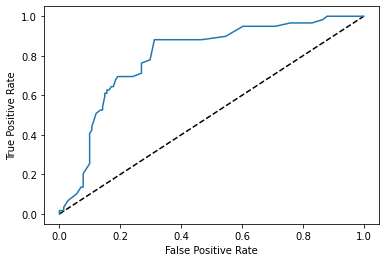

In [69]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Saving the model in pickle format

In [72]:
import pickle
filename='Insurance Claim Fraud Detection .pkl'
pickle.dump(rfc,open(filename,"wb"))

# Conclusion

In [73]:
model=pickle.load(open('Insurance Claim Fraud Detection .pkl',"rb"))
result=model.score(x_test,y_test)
print(result)

0.69


In [74]:
conclusion=pd.DataFrame([model.predict(x_test)[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Predicted,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
Original,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
